# Volatility Clustering in Financial Markets

## Definition
**Volatility clustering** is a key concept in financial time series where large price changes tend to be followed by large changes (of either sign), and small changes tend to be followed by small ones.  
In other words, **volatility is autocorrelated**, even though returns themselves are not.  
This means that while you cannot predict whether the market will go up or down, you *can* often tell whether it will be calm or turbulent.

---

## Example
During the COVID-19 crash in March 2020, the S&P 500 experienced days of extreme price swings for several weeks.  
These high volatility periods were then followed by calmer, low-volatility periods demonstrating **volatility clustering**.

---

## Objective
This project visualizes and analyzes volatility clustering using:
- The **S&P 500 Index** (ticker: `^GSPC`)
- Different time intervals (daily, hourly, weekly)
- Statistical and visual methods including:
  - Log returns plots
  - Autocorrelation of returns and absolute returns
  - Rolling volatility envelopes

---

## Importing Libraries and Data

In [20]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Fetch daily S&P 500 data
data = yf.download("^GSPC", start="2015-01-01", end="2025-01-01")

[*********************100%***********************]  1 of 1 completed


## Compute Log Returns

In [21]:
log_returns = np.log(data["Close"] / data["Close"].shift(1)).dropna()
abs_returns = np.abs(log_returns)

## Visualize Returns

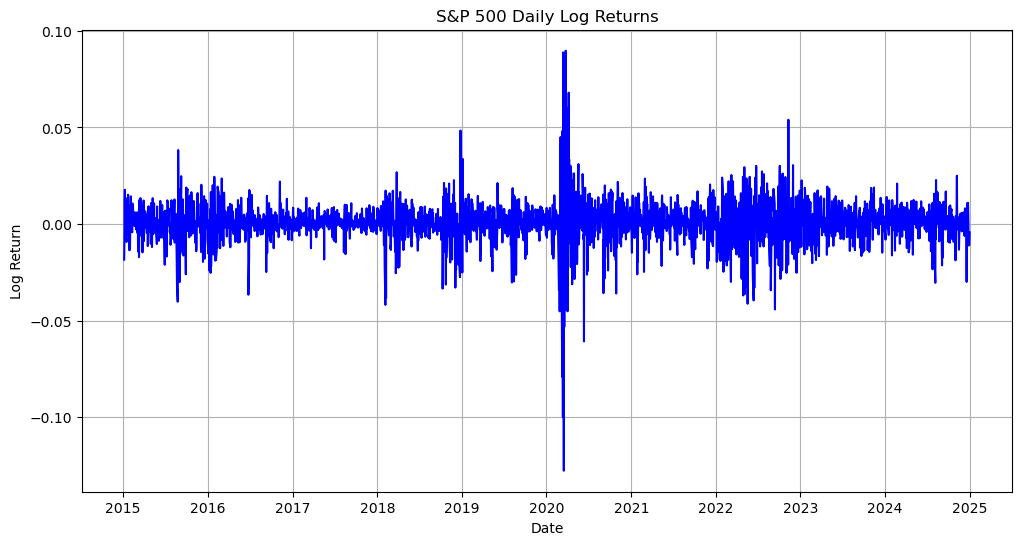

In [22]:
# Plot log returns
plt.figure(figsize=(12,6))
plt.plot(log_returns, color='blue')
plt.title("S&P 500 Daily Log Returns")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.grid(True)
plt.show()

## Autocorrelation Function (ACF)

<Figure size 1000x400 with 0 Axes>

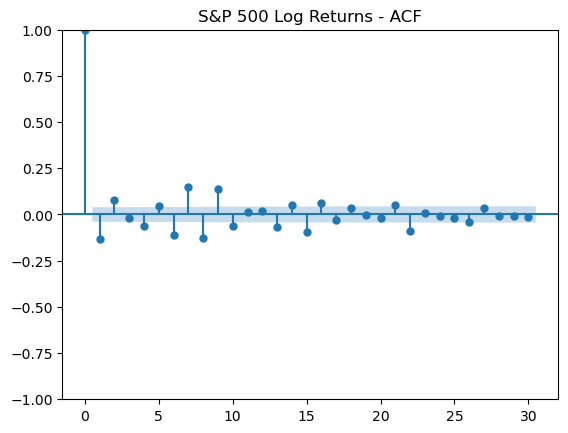

<Figure size 1000x400 with 0 Axes>

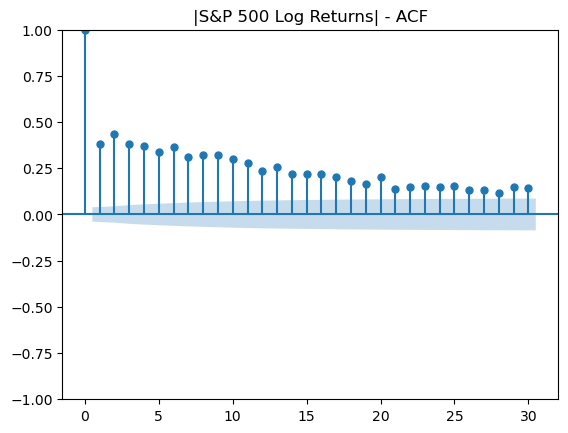

In [24]:
# Plot ACF of log returns
plt.figure(figsize=(10, 4))
plot_acf(log_returns, lags=30)
plt.title("S&P 500 Log Returns - ACF")
plt.show()

# Plot ACF of absolute log returns
plt.figure(figsize=(10, 4))
plot_acf(abs_returns, lags=30)
plt.title("|S&P 500 Log Returns| - ACF")
plt.show()

## Volatility Envelope (Rolling Std Dev)

In [25]:
window = 20  # rolling window in days
k = 2        # envelope width in std deviations

# rolling mean and std of log returns
rolling_mean = log_returns.rolling(window=window).mean()
rolling_std = log_returns.rolling(window=window).std()

# upper and lower envelope
upper_envelope = rolling_mean + k * rolling_std
lower_envelope = rolling_mean - k * rolling_std

# Drop NaNs from rolling calculations
valid_idx = rolling_mean.dropna().index
rolling_mean = rolling_mean.loc[valid_idx]
rolling_std = rolling_std.loc[valid_idx]
upper_envelope = upper_envelope.loc[valid_idx]
lower_envelope = lower_envelope.loc[valid_idx]
log_returns_trimmed = log_returns.loc[valid_idx]

# Ensure 1D arrays
rolling_mean_1d = rolling_mean.values.flatten()
rolling_std_1d = rolling_std.values.flatten()
upper_envelope_1d = upper_envelope.values.flatten()
lower_envelope_1d = lower_envelope.values.flatten()
log_returns_1d = log_returns.loc[valid_idx].values.flatten()

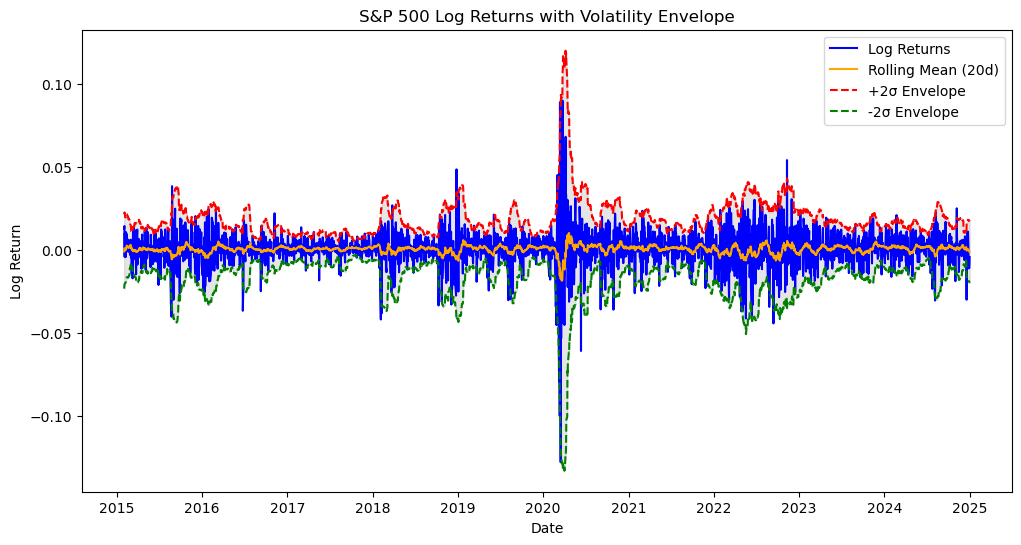

In [26]:
plt.figure(figsize=(12,6))
plt.plot(valid_idx, log_returns_1d, label="Log Returns", color="blue")
plt.plot(valid_idx, rolling_mean_1d, label=f"Rolling Mean ({window}d)", color="orange")
plt.plot(valid_idx, upper_envelope_1d, label=f"+{k}σ Envelope", color="red", linestyle="--")
plt.plot(valid_idx, lower_envelope_1d, label=f"-{k}σ Envelope", color="green", linestyle="--")
plt.fill_between(valid_idx, lower_envelope_1d, upper_envelope_1d, color='gray', alpha=0.2)
plt.title("S&P 500 Log Returns with Volatility Envelope")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.legend()
plt.show()